/var/tmp/ipykernel_347457/3802716606.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread('/home/suriya/cyto-mask/final_bf/500.png')


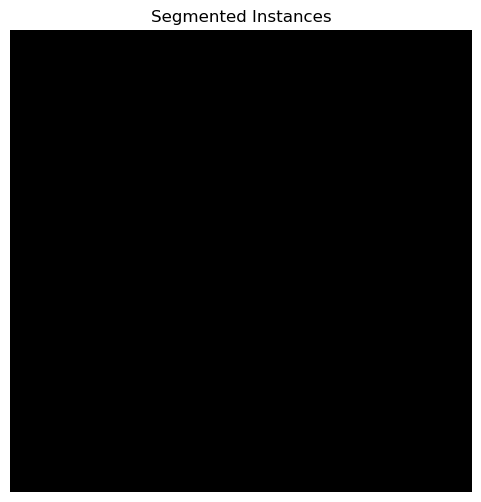

/var/tmp/ipykernel_347457/3802716606.py:52: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread('/home/suriya/cyto-mask/final_bf/500.png')


AttributeError: 'Sam' object has no attribute 'generate'

In [ ]:
from segment_anything import 
from imageio import imread
import numpy as np
import matplotlib.pyplot as plt
import micro_sam
from micro_sam.models import sam_model_registry

# Load the grayscale image
image = imread('/home/suriya/cyto-mask/final_bf/500.png')

# Convert from uint16 to uint8 if needed
if image.dtype == np.uint16:
    image = (image / 256).astype(np.uint8)  # Scale 0–65535 → 0–255

# If it's grayscale, convert to RGB
if image.ndim == 2:
    image = np.stack([image]*3, axis=-1)  # Shape (H, W, 3)

# Load the SAM model
sam_checkpoint = "/home/suriya/cyto-mask/vit_l.pt"
model_type = "vit_l"
sam_model = sam_model_registry[model_type](checkpoint=sam_checkpoint).cuda()

# Initialize the mask generator
mask_generator = SamAutomaticMaskGenerator(sam_model)

# Generate masks
masks = mask_generator.generate(image)

# Create segmentation map
segmentation = np.zeros(image.shape[:2], dtype=np.uint16)
for i, mask in enumerate(masks):
    print(f"Mask {i}: Area = {mask['area']}, Bounding Box = {mask['bbox']}")
    segmentation[mask['segmentation']] = i + 1

# Visualize
plt.figure(figsize=(6, 6))
plt.imshow(segmentation, cmap='nipy_spectral')
plt.axis('off')
plt.title('Segmented Instances')
plt.show()


# Load model directly from path using the model registry
# Load the micro_sam model
model = sam_model_registry['vit_l'](
    checkpoint='/home/suriya/cyto-mask/vit_l.pt'
).cuda()


# Load the image
image = imread('/home/suriya/cyto-mask/final_bf/500.png')
# Convert from uint16 to uint8 if needed
if image.dtype == np.uint16:
    image = (image / 256).astype(np.uint8)  # Scale 0–65535 → 0–255
# If it's grayscale, convert to RGB 
if image.ndim == 2:
    image = np.stack([image]*3, axis=-1)  # Shape (H, W, 3)
# Generate masks
masks = model.generate(image)
# Create segmentation map
segmentation = np.zeros(image.shape[:2], dtype=np.uint16)
for i, mask in enumerate(masks):
    print(f"Mask {i}: Area = {mask['area']}, Bounding Box = {mask['bbox']}")
    segmentation[mask['segmentation']] = i + 1
# Visualize
plt.figure(figsize=(6, 6))
plt.imshow(segmentation, cmap='nipy_spectral')
plt.axis('off')
plt.title('Segmented Instances')
plt.show()

/var/tmp/ipykernel_347457/3142705653.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)
/var/tmp/ipykernel_347457/3142705653.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  segmentation = imageio.imread(segmentation_path)
/var/tmp/ipykernel_347457/3142705653.py:45: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  closed_edges = closing(binary_edges, square(1))


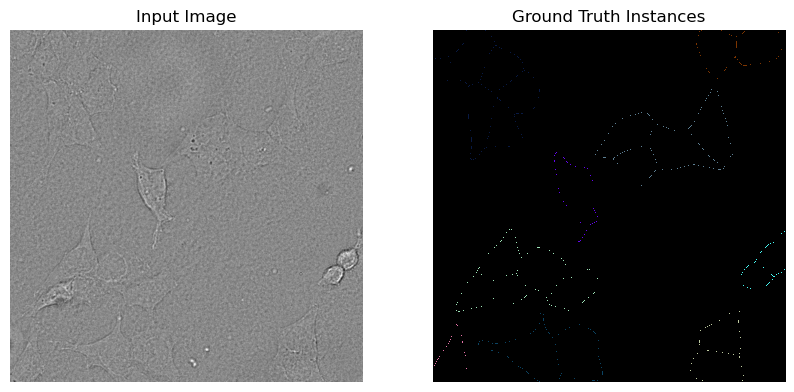

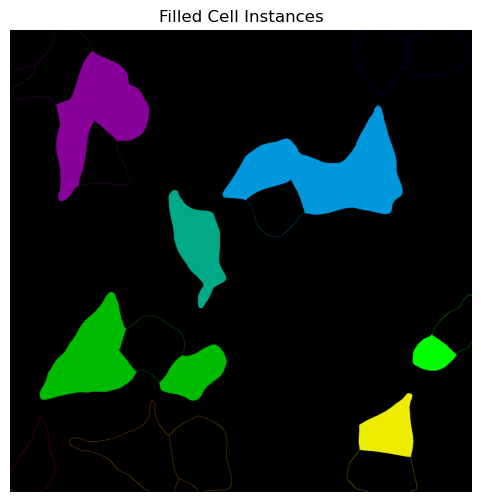

In [ ]:
from skimage.measure import label as connected_components
import imageio
from torch_em.util.util import get_random_colors


image_path = "/home/suriya/cyto-mask/final_bf/500.png"
segmentation_path = "/home/suriya/cyto-mask/final_edge_detected/merged_edges_500.png"

image = imageio.imread(image_path)
segmentation = imageio.imread(segmentation_path)

fig, ax = plt.subplots(1, 2, figsize=(10, 10))

ax[0].imshow(image, cmap="gray")
ax[0].set_title("Input Image")
ax[0].axis("off")

segmentation = connected_components(segmentation)
ax[1].imshow(segmentation, cmap=get_random_colors(segmentation), interpolation="nearest")
ax[1].set_title("Ground Truth Instances")
ax[1].axis("off")

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, measure, morphology, color
from skimage.draw import polygon
from scipy.ndimage import binary_fill_holes
from skimage.morphology import closing, square

image = io.imread('/home/suriya/cyto-mask/final_edge_detected/merged_edges_500.png')

# Extract only the right side (ground truth instances)
gt_instances = image

# Convert to grayscale if it's RGB
if gt_instances.ndim == 3:
    gt_gray = color.rgb2gray(gt_instances)
else:
    gt_gray = gt_instances

# Binarize (any non-zero pixel is part of an edge)
binary_edges = gt_gray > 0

# Close small gaps in the edges
closed_edges = closing(binary_edges, square(1))



# Fill holes to get full cell masks
filled_cells = binary_fill_holes(closed_edges)

# Label each connected component
labeled_cells = measure.label(f)

# Display the result
plt.figure(figsize=(6, 6))
plt.imshow(labeled_cells, cmap='nipy_spectral')
plt.title('Filled Cell Instances')
plt.axis('off')
plt.show()

# fill inside the contours in the segmentation

In [22]:
! napari

00:30:17 : WARNING : MainThread : could not connect to display 
00:30:17 : WARNING : MainThread : Could not load the Qt platform plugin "xcb" in "" even though it was found.

Available platform plugins are: eglfs, minimal, minimalegl, offscreen, vnc, webgl, xcb.

00:30:17 : WARNING : MainThread : This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: eglfs, minimal, minimalegl, offscreen, vnc, webgl, xcb.



In [ ]:
############################################# MICROSAM ###################################

In [5]:
!python -m ipykernel install --user --name=firstEnv

Installed kernelspec firstEnv in /home/suriya/.local/share/jupyter/kernels/firstenv


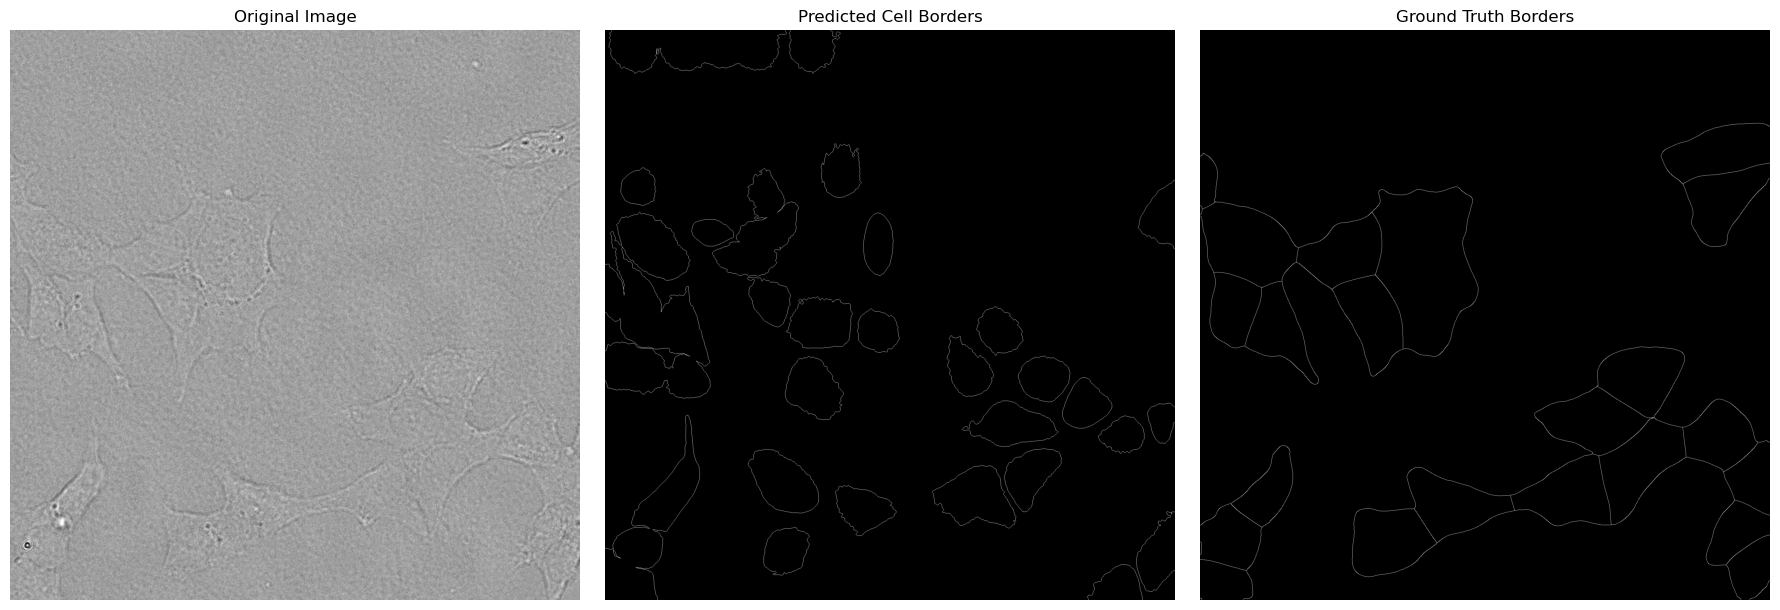

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from micro_sam.util import get_sam_model
from segment_anything import SamAutomaticMaskGenerator
import skimage.morphology as morph
from skimage.segmentation import find_boundaries

from sklearn.metrics import precision_score, recall_score, f1_score
#The function get_sam_model(model_type="vit_l_lm", device="cuda") loads a pre-trained micro-SAM model. 
# The vit_l_lm indicates it's using a ViT-L backbone with language modeling capabilities specific to microscopy data.
#Use this model along with SAM's automatic mask generator to segment cells in brightfield microscopy images without requiring any manual prompts
def micro_sam_bf(img_path, gt_path):
    # 1) Load the raw brightfield image
    raw = cv2.imread(img_path)
    assert raw is not None, f"Couldn't read {img_path}"

    # 2) Apply simple contrast enhancement using CLAHE
    gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = clahe.apply(gray)

    # Perform percentile-based contrast stretching
    p2, p98 = np.percentile(enhanced, (2, 98))
    enhanced = np.clip((enhanced - p2) * 255.0 / (p98 - p2), 0, 255).astype(np.uint8)

    # Convert back to 3-channel RGB for SAM model input
    image = cv2.cvtColor(enhanced, cv2.COLOR_GRAY2RGB)

    # 3) Initialize the SAM model (micro_sam version) for segmentation
    predictor = get_sam_model(model_type="vit_l_lm", device="cuda")
    predictor.set_image(image)

    # 4) Generate masks automatically using SAM's automatic mask generator
    mask_generator = SamAutomaticMaskGenerator(
        predictor.model,
        pred_iou_thresh=0.45,            # Confidence threshold for mask prediction
        stability_score_thresh=0.4,     # Stability threshold for mask filtering
        box_nms_thresh=0.4,              # Non-maximum suppression threshold
        crop_n_layers=0,                 # Disable cropping
    )
    cands = mask_generator.generate(image)

    # 5) Filter the masks by area size (keep only plausible cell-sized objects)
    cell_masks = [
        c["segmentation"]
        for c in cands
        if 10000 < c["area"] < 45000  # Area filter: discard too small or too large masks
    ]

    # 6) Merge all selected cell masks into one global mask
    if len(cell_masks) == 0:
        raise RuntimeError("No segments passed area filter.")

    global_mask = np.any(np.stack(cell_masks), axis=0)

    # 7) Basic morphological cleaning:
    clean = morph.remove_small_objects(global_mask, min_size=5000)  # Remove small noise
    clean = morph.remove_small_holes(clean, area_threshold=5000)    # Fill small holes

    # 8) Generate cell borders from the cleaned mask
    cell_borders = find_boundaries(clean, mode="outer")  # Detect object boundaries

    # Create an empty black background image
    border_image = np.zeros_like(raw)

    # Draw the cell borders as white pixels on the black background
    border_image[cell_borders] = 255

    # 9) Load the ground truth (GT) border image for comparison
    gt_raw = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)
    if gt_raw is None:
        raise RuntimeError(f"Couldn't read {gt_path}")

    # 11) Return predicted border image and ground truth image
    return border_image, gt_raw


border_image, gt_raw = micro_sam_bf(
    "/home/suriya/cyto-mask/final_bf/417.png",
    "final_edge_detected/merged_edges_417.png"
)

# 10) Visualization: plot the raw image, the predicted borders, and the ground truth
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Left: Original raw image
raw = cv2.imread("/home/suriya/cyto-mask/final_bf/417.png")
axes[0].imshow(raw)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Middle: Predicted borders
axes[1].imshow(border_image)
axes[1].set_title("Predicted Cell Borders")
axes[1].axis("off")

# Right: Ground truth borders
axes[2].imshow(gt_raw, cmap='gray')
axes[2].set_title("Ground Truth Borders")
axes[2].axis("off")

plt.tight_layout()
plt.show()

Intersection over Union (IoU): 0.0079
Precision: 0.0140
Recall: 0.0176
F1 Score: 0.0156


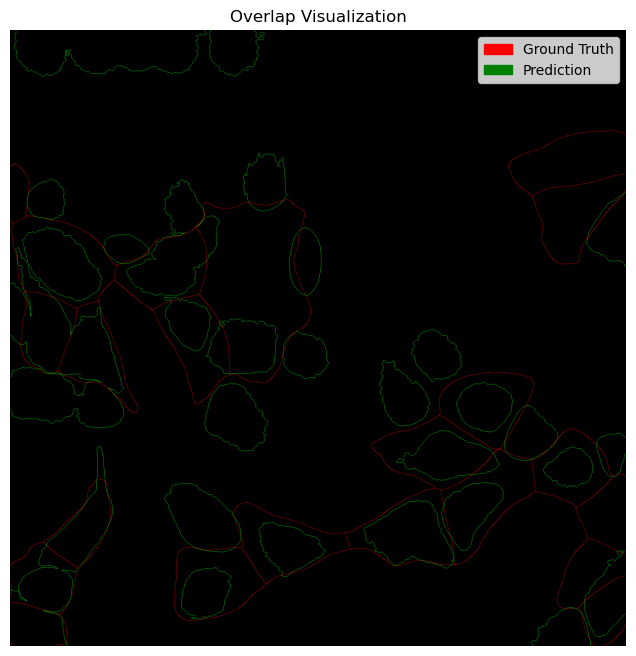

(0.007868221442318577,
 0.013998690769927992,
 0.017649673036632594,
 0.015613591687728166)

In [188]:
def plot_intersection(border_image, gt_raw):
    # Convert to grayscale if not already
    if len(border_image.shape) > 2:
        border_image_1d = cv2.cvtColor(border_image, cv2.COLOR_BGR2GRAY)
    else:
        border_image_1d = border_image.copy()
    
    # Apply thresholding to create binary masks
    pred_binary = (border_image_1d > 0).astype(np.uint8)
    gt_binary = (gt_raw > 0).astype(np.uint8)
    
    # Flatten for metric calculation
    pred_flat = pred_binary.flatten()
    gt_flat = gt_binary.flatten()
    
    # Compute Intersection over Union (IoU)
    intersection = np.sum(np.logical_and(pred_flat, gt_flat))
    union = np.sum(np.logical_or(pred_flat, gt_flat))
    iou = intersection / union if union > 0 else 0
    
    # Compute Precision, Recall, and F1-Score
    from sklearn.metrics import precision_score, recall_score, f1_score
    
    # Handle case where gt is all zeros
    if np.sum(gt_flat) == 0:
        precision = 1.0 if np.sum(pred_flat) == 0 else 0.0
        recall = 1.0
        f1 = 1.0 if np.sum(pred_flat) == 0 else 0.0
    else:
        precision = precision_score(gt_flat, pred_flat)
        recall = recall_score(gt_flat, pred_flat)
        f1 = f1_score(gt_flat, pred_flat)
    
    # Print the metrics
    print(f"Intersection over Union (IoU): {iou:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Create a color-coded visualization
    # Create RGB image for visualization (black background)
    vis_img = np.zeros((gt_raw.shape[0], gt_raw.shape[1], 3), dtype=np.uint8)
    
    # Ground truth in RED
    vis_img[gt_binary > 0] = [255, 0, 0]  # Red for ground truth
    
    # Prediction in GREEN
    vis_img[pred_binary > 0] = [0, 255, 0]  # Green for prediction

    
    # Plot the result
    plt.figure(figsize=(10, 8))
    plt.imshow(vis_img)
    plt.title("Overlap Visualization")
    plt.axis("off")
    
    # Add a legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='red', edgecolor='red', label='Ground Truth'),
        Patch(facecolor='green', edgecolor='green', label='Prediction'),
    ]
    plt.legend(handles=legend_elements, loc='upper right')
    
    plt.show()
    
    return iou, precision, recall, f1

plot_intersection(border_image, gt_raw)


In [ ]:
import os
import numpy as np
import cv2
from sklearn.metrics import precision_score, recall_score, f1_score

def micro_sam_bf(pred_path, gt_path):
    pred = cv2.imread(pred_path, cv2.IMREAD_UNCHANGED)
    gt = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)
    return pred, gt

def evaluate_with_params(pred_dir, gt_dir, thresholds=[0], dilate_iters=[0]):
    best_metrics = {'iou': 0, 'precision': 0, 'recall': 0, 'f1': 0}
    best_params = {}
    results = []

    for thresh in thresholds:
        for dilate_iter in dilate_iters:
            iou_scores = []
            precision_scores = []
            recall_scores = []
            f1_scores = []

            pred_files = [f for f in os.listdir(pred_dir) if f.endswith('.png')]

            for pred_file in pred_files:
                pred_path = os.path.join(pred_dir, pred_file)
                gt_file = "merged_edges_" + pred_file
                gt_path = os.path.join(gt_dir, gt_file)

                if not os.path.exists(gt_path):
                    print(f"Ground truth not found for {pred_file}, skipping...")
                    continue

                raw_pred, raw_gt = micro_sam_bf(pred_path, gt_path)

                # Convert prediction to grayscale if needed
                pred_gray = cv2.cvtColor(raw_pred, cv2.COLOR_BGR2GRAY) if len(raw_pred.shape) == 3 else raw_pred

                # Apply threshold
                _, pred_bin = cv2.threshold(pred_gray, thresh, 255, cv2.THRESH_BINARY)
                pred_bin = (pred_bin > 0).astype(np.uint8)

                # Optional dilation
                if dilate_iter > 0:
                    kernel = np.ones((3, 3), np.uint8)
                    pred_bin = cv2.dilate(pred_bin, kernel, iterations=dilate_iter)

                # Binarize GT if not already binary
                gt_bin = (raw_gt > 0).astype(np.uint8)

                # Flatten
                pred_flat = pred_bin.flatten()
                gt_flat = gt_bin.flatten()

                # Compute metrics
                intersection = np.sum(np.logical_and(pred_flat, gt_flat))
                union = np.sum(np.logical_or(pred_flat, gt_flat))
                iou = intersection / union if union > 0 else 0
                precision = precision_score(gt_flat, pred_flat, zero_division=0)
                recall = recall_score(gt_flat, pred_flat, zero_division=0)
                f1 = f1_score(gt_flat, pred_flat, zero_division=0)

                iou_scores.append(iou)
                precision_scores.append(precision)
                recall_scores.append(recall)
                f1_scores.append(f1)

            avg_iou = np.mean(iou_scores)
            avg_precision = np.mean(precision_scores)
            avg_recall = np.mean(recall_scores)
            avg_f1 = np.mean(f1_scores)

            results.append({
                'threshold': thresh,
                'dilate': dilate_iter,
                'avg_iou': avg_iou,
                'avg_precision': avg_precision,
                'avg_recall': avg_recall,
                'avg_f1': avg_f1
            })

            # Update best if this is better
            if avg_f1 > best_metrics['f1']:
                best_metrics = {
                    'iou': avg_iou,
                    'precision': avg_precision,
                    'recall': avg_recall,
                    'f1': avg_f1
                }
                best_params = {'threshold': thresh, 'dilate': dilate_iter}

    # Report
    print("=== Best Parameters ===")
    print(f"Threshold: {best_params['threshold']}, Dilation: {best_params['dilate']}")
    print("=== Best Metrics ===")
    print(f"IoU: {best_metrics['iou']:.4f}, Precision: {best_metrics['precision']:.4f}, Recall: {best_metrics['recall']:.4f}, F1: {best_metrics['f1']:.4f}")

    return results, best_params, best_metrics


# Example usage
results, best_params, best_metrics = evaluate_with_params(
    pred_dir="/home/suriya/cyto-mask/final_bf",
    gt_dir="/home/suriya/cyto-mask/final_edge_detected",
    thresholds=range(10, 200, 20),
    dilate_iters=[0, 1, 2]
)


In [ ]:
import os
import numpy as np
import cv2
from sklearn.metrics import precision_score, recall_score, f1_score


#get average metrics - really bad at the moment. 
# The low precision, recall, and F1 score likely result from misalignment between the predicted and ground truth borders, or overly strict 
# thresholding that reduces the accuracy of the predicted edges.
# Even with decent IoU, small discrepancies in border placement or overly sparse features can lead to poor precision and recall metrics.
# model training is not necessarily useful at we only have 500 unique images and can lead to more noise. 
#Slight misalignments in borders cause a big penalty on precision/recall even if IoU looks okay.
def evaluate_micro_sam_bf(pred_dir, gt_dir):
    iou_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    # List all files in the prediction directory
    pred_files = [f for f in os.listdir(pred_dir) if f.endswith('.png')]

    for pred_file in pred_files:
        pred_path = os.path.join(pred_dir, pred_file)

        # Create corresponding ground truth filename
        gt_file = "merged_edges_" + pred_file
        gt_path = os.path.join(gt_dir, gt_file)

        # Check if ground truth file exists
        if not os.path.exists(gt_path):
            print(f"Ground truth not found for {pred_file}, skipping...")
            continue

        # Load images
        raw_pred, raw_gt = micro_sam_bf(pred_path, gt_path)

        # Convert to grayscale if needed
        if len(raw_pred.shape) == 3:
            pred_gray = cv2.cvtColor(raw_pred, cv2.COLOR_BGR2GRAY)
        else:
            pred_gray = raw_pred

        gt_gray = raw_gt  # Already grayscale

        # Threshold to binary
        pred_bin = (pred_gray > 0).astype(np.uint8).flatten()
        gt_bin = (gt_gray > 0).astype(np.uint8).flatten()

        # Compute IoU
        intersection = np.sum(np.logical_and(pred_bin, gt_bin))
        union = np.sum(np.logical_or(pred_bin, gt_bin))
        iou = intersection / union if union > 0 else 0

        # Compute Precision, Recall, F1
        precision = precision_score(gt_bin, pred_bin)
        recall = recall_score(gt_bin, pred_bin)
        f1 = f1_score(gt_bin, pred_bin)

        # Save metrics
        iou_scores.append(iou)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

        # Print per-image metrics
        print(f"Results for {pred_file}:")
        print(f"  IoU: {iou:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
        print()

    # Compute average metrics
    avg_iou = np.mean(iou_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_f1 = np.mean(f1_scores)

    # Print average metrics
    print("=== Average Metrics Across All Images ===")
    print(f"Average Intersection over Union (IoU): {avg_iou:.4f}")
    print(f"Average Precision: {avg_precision:.4f}")
    print(f"Average Recall: {avg_recall:.4f}")
    print(f"Average F1 Score: {avg_f1:.4f}")

# Example usage
evaluate_micro_sam_bf(
    pred_dir="/home/suriya/cyto-mask/final_bf",
    gt_dir="/home/suriya/cyto-mask/final_edge_detected"
)



Results for 144_rotated80_.png:
  IoU: 0.0021, Precision: 0.0063, Recall: 0.0031, F1: 0.0041

Results for 93.png:
  IoU: 0.0035, Precision: 0.0093, Recall: 0.0057, F1: 0.0070

Results for 265_rotated77_.png:
  IoU: 0.0033, Precision: 0.0093, Recall: 0.0050, F1: 0.0065

Results for 78.png:
  IoU: 0.0034, Precision: 0.0083, Recall: 0.0056, F1: 0.0067

Results for 254_rotated299_.png:
  IoU: 0.0012, Precision: 0.0030, Recall: 0.0021, F1: 0.0025

Results for 166.png:
  IoU: 0.0018, Precision: 0.0094, Recall: 0.0022, F1: 0.0036

Results for 95.png:
  IoU: 0.0058, Precision: 0.0113, Recall: 0.0118, F1: 0.0115

Results for 308_rotated173_.png:
  IoU: 0.0070, Precision: 0.0145, Recall: 0.0135, F1: 0.0140

Results for 185.png:
  IoU: 0.0078, Precision: 0.0177, Recall: 0.0137, F1: 0.0154

Results for 25_rotated81_.png:
  IoU: 0.0019, Precision: 0.0074, Recall: 0.0025, F1: 0.0038

Results for 400.png:
  IoU: 0.0084, Precision: 0.0148, Recall: 0.0190, F1: 0.0166

Results for 11_rotated297_.png:
  

In [ ]:
import numpy as np
import torch
import cv2
import os
import glob # Import glob for easier file matching
from sam2.build_sam import build_sam2
from sam2.sam2_image_predictor import SAM2ImagePredictor
import time # Optional: for timing steps

# --- Configuration ---
dataset_root = "cyto-mask/50_dataset" # Path to the root of your dataset
image_subdir = "bf"          # Subdirectory containing images
mask_subdir = "binary_masks"         # Subdirectory containing mask directories
image_extension = ".png"     # Extension of your image files
mask_extension = ".png"      # Extension of your mask files

# --- 1. Gather Data ---
print("Scanning dataset...")
data = []
image_dir = os.path.join(dataset_root, image_subdir)
print(f"Image directory: {image_dir}")
mask_root_dir = os.path.join(dataset_root, mask_subdir)
print(f"Mask root directory: {mask_root_dir}")

# Iterate through images in the image directory
for image_filename in os.listdir(image_dir):
    if image_filename.endswith(image_extension):
        image_path = os.path.join(image_dir, image_filename)
        # Construct the corresponding mask directory path
        # Assumes mask directory name is the image filename without extension
        mask_dir_name = os.path.splitext(image_filename)[0]
        mask_dir_path = os.path.join(mask_root_dir, mask_dir_name)

        # Check if the corresponding mask directory exists and is a directory
        if os.path.isdir(mask_dir_path):
            # Check if there are any mask files inside
            mask_files = os.listdir(mask_dir_path)
            mask_files = [f for f in mask_files if f.endswith(mask_extension)]
            if mask_files: # Only add if mask directory exists and is not empty
                data.append({"image": image_path, "mask_dir": mask_dir_path})
            else:
                print(f"Warning: Mask directory exists but is empty: {mask_dir_path}")
        # else:
            # print(f"Warning: No corresponding mask directory found for {image_filename} at {mask_dir_path}")


if not data:
    raise ValueError(f"No valid image/mask pairs found in {dataset_root}. Check paths and structure.")

print(f"Found {len(data)} image/mask pairs.")

# --- 2. Modified read_batch Function ---
def read_batch(data):
    """
    Reads a random image and all its corresponding binary mask files.
    Generates a random point prompt for each valid mask.
    """
    if not data:
        return None, None, None, None # Handle empty data list case

    # Select a random image entry
    entry = data[np.random.randint(len(data))]

    image_path = entry["image"]
    mask_dir = entry["mask_dir"]

    # Read image
    try:
        Img = cv2.imread(image_path)
        if Img is None:
            print(f"Warning: Failed to read image {image_path}. Skipping.")
            return None, None, None, None
        Img = Img[..., ::-1] # Convert BGR to RGB
    except Exception as e:
        print(f"Error reading image {image_path}: {e}. Skipping.")
        return None, None, None, None

    orig_h, orig_w = Img.shape[:2]

    # Resize image (same logic as before)
    r = np.min([1024 / orig_w, 1024 / orig_h]) # scaling factor
    new_w, new_h = int(orig_w * r), int(orig_h * r)
    Img = cv2.resize(Img, (new_w, new_h))

    masks = []
    points = []

    # Find and process all mask files in the directory
    mask_files = glob.glob(os.path.join(mask_dir, f"*{mask_extension}"))

    if not mask_files:
         print(f"Warning: No mask files ({mask_extension}) found in {mask_dir} for image {image_path}. Skipping.")
         return None, None, None, None # No masks for this image

    for mask_file in mask_files:
        try:
            # Read mask as grayscale
            mask = cv2.imread(mask_file, cv2.IMREAD_GRAYSCALE)
            if mask is None:
                print(f"Warning: Failed to read mask {mask_file}. Skipping this mask.")
                continue

            # Resize mask using nearest neighbor interpolation
            mask = cv2.resize(mask, (new_w, new_h), interpolation=cv2.INTER_NEAREST)

            # Ensure mask is binary (0 or 1)
            mask = (mask > 127).astype(np.uint8) # Threshold and convert to uint8 {0, 1}

            # Check if mask is empty after resizing/thresholding
            if mask.sum() == 0:
                # print(f"Warning: Mask {mask_file} is empty after processing. Skipping.")
                continue

            # Get coordinates of non-zero pixels
            coords = np.argwhere(mask > 0)
            if len(coords) == 0: # Should be redundant due to mask.sum() check, but safe
                 continue

            # Choose a random point within the mask
            yx = coords[np.random.randint(len(coords))] # Random (y, x) coordinate

            # Append mask and point (SAM expects [x, y] format for points)
            masks.append(mask)
            points.append([[yx[1], yx[0]]]) # Note the order change: [x, y]

        except Exception as e:
            print(f"Error processing mask {mask_file}: {e}. Skipping this mask.")
            continue

    # If no valid masks were found/processed for this image
    if not masks:
        # print(f"Warning: No valid masks processed for image {image_path}. Skipping batch.")
        return None, None, None, None # Indicate an empty batch

    # Convert lists to numpy arrays
    masks_np = np.array(masks)
    points_np = np.array(points)
    labels_np = np.ones([len(masks), 1], dtype=np.int64) # Labels are 1 for positive points

    return Img, masks_np, points_np, labels_np

# --- Load Model ---
print("Loading MICROSAM model...")
# sam2_checkpoint = "sam2_hiera_small.pt" # Make sure this path is correct
# Use a full path if necessary, e.g., /path/to/your/weights/sam2_hiera_small.pt
microsam_checkpoint = "../checkpoints/microsam.pt" # Example using tiny model
model_cfg = "../sam2/configs/sam2.1/microsam.yaml"         # Example using tiny config
# sam2_checkpoint = "sam2_hiera_small.pt"
# model_cfg = "sam2_hiera_s.yaml" # Corresponding config for small model

if not os.path.exists(microsam_checkpoint):
    raise FileNotFoundError(f"MICROSAM2 checkpoint not found at: {microsam_checkpoint}")
if not os.path.exists(model_cfg):
     raise FileNotFoundError(f"MICROSAM2 model config not found at: {model_cfg}")

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")
sam2_model = build_sam2(model_cfg, microsam_checkpoint, device=device)
predictor = SAM2ImagePredictor(sam2_model)
print("Model loaded.")

# --- Set Training Parameters ---
print("Setting up training...")
# Enable training for decoder and prompt encoder
predictor.model.sam_mask_decoder.train(True)
predictor.model.sam_prompt_encoder.train(True)

# Optional: Enable image encoder training (requires more GPU memory and code changes for no_grad)
# predictor.model.image_encoder.train(True)
# print("WARNING: Image encoder training enabled. Ensure 'no_grad' blocks are handled if needed.")

# Filter parameters that require gradients
params_to_optimize = [
    p for p in predictor.model.parameters() if p.requires_grad
]

# Check if there are parameters to optimize
if not params_to_optimize:
     raise ValueError("No parameters require gradients. Check model train() flags.")
else:
    print(f"Optimizing {len(params_to_optimize)} parameter tensors.")


optimizer = torch.optim.AdamW(params=params_to_optimize, lr=1e-5, weight_decay=4e-5)

# Use GradScaler only if using CUDA
scaler = torch.cuda.amp.GradScaler() if device == "cuda" else None
# --- Training Loop ---
print("Starting training loop...")
num_iterations = 100000
save_interval = 1000
mean_iou = 0.0 # Initialize mean IOU
batch_skip_count = 0

for itr in range(num_iterations):
    optimizer.zero_grad() # Move zero_grad here for clarity

    # --- Load Data Batch ---
    image, gt_masks_np, input_points_np, input_labels_np = read_batch(data)

    # Handle cases where read_batch returns None (e.g., file errors, no masks)
    if image is None or gt_masks_np is None or gt_masks_np.shape[0] == 0:
        batch_skip_count += 1
        if batch_skip_count > 100 and batch_skip_count % 100 == 0: # Avoid spamming logs
             print(f"Warning: Skipped {batch_skip_count} batches due to loading issues or empty masks.")
        if batch_skip_count > len(data) * 2: # Stop if consistently failing
             print("Error: Consistently failing to load valid batches. Check data integrity and paths.")
             break
        continue # Skip to next iteration

    batch_skip_count = 0 # Reset skip count on successful batch load

    # --- Mixed Precision Context ---
    # Use autocast only if using CUDA and scaler is available
    autocast_enabled = (device == "cuda" and scaler is not None)
    with torch.cuda.amp.autocast(enabled=autocast_enabled):
        # --- Image Encoding ---
        try:
            predictor.set_image(image) # Apply SAM image encoder
        except Exception as e:
            print(f"Error during predictor.set_image: {e}. Skipping batch {itr}.")
            torch.cuda.empty_cache() # Try to clear cache if OOM related
            continue


        # --- Prompt Encoding ---
        # Ensure points and labels are on the correct device
        # Note: _prep_prompts handles moving to device internally based on predictor's device
        # However, explicitly creating tensors might be needed depending on internal details.
        # Let's rely on _prep_prompts for now.
        try:
             mask_input, unnorm_coords, labels, unnorm_box = predictor._prep_prompts(
                input_points_np, input_labels_np, box=None, mask_logits=None, normalize_coords=True
             )
             sparse_embeddings, dense_embeddings = predictor.model.sam_prompt_encoder(
                points=(unnorm_coords, labels), boxes=None, masks=None,
             )
        except Exception as e:
             print(f"Error during prompt encoding: {e}. Skipping batch {itr}.")
             torch.cuda.empty_cache()
             continue


        # --- Mask Decoder ---
        try:
            batched_mode = unnorm_coords.shape[0] > 1 # multi object prediction
            # Ensure features are on the correct device (should be handled by predictor.set_image)
            # Accessing internal features like this can be brittle if SAM2 internals change.
            high_res_features = [feat_level[-1].unsqueeze(0) for feat_level in predictor._features["high_res_feats"]]
            image_embed = predictor._features["image_embed"][-1].unsqueeze(0)

            low_res_masks, prd_scores, _, _ = predictor.model.sam_mask_decoder(
                image_embeddings=image_embed,
                image_pe=predictor.model.sam_prompt_encoder.get_dense_pe(),
                sparse_prompt_embeddings=sparse_embeddings,
                dense_prompt_embeddings=dense_embeddings,
                multimask_output=True, # Usually True for SAM, produces multiple mask qualities
                repeat_image=batched_mode,
                high_res_features=high_res_features,
            )
            # Upscale the masks to the original image resolution -> uses input image size before predictor resize
            # predictor._orig_hw[-1] should contain the size of the image *after* predictor's internal resizing,
            # which matches the gt_masks_np dimensions.
            # Get the size of the image as it was passed to set_image
            # This should match the dimensions of gt_masks_tensor
            target_hw = predictor._orig_hw[0] if predictor._orig_hw else None
            if target_hw is None:
                print(f"Error: predictor.original_size is None after set_image. Skipping batch {itr}.")
                torch.cuda.empty_cache()
                continue # Skip this problematic batch

            # Upscale the low-resolution masks to the target size (which matches the GT mask size)
            prd_masks_logits = predictor._transforms.postprocess_masks(low_res_masks, target_hw)

        except Exception as e:
            print(f"Error during mask decoding: {e}. Skipping batch {itr}.")
            print(f"Shapes - image_embed: {image_embed.shape}, sparse: {sparse_embeddings.shape}, dense: {dense_embeddings.shape}")
            torch.cuda.empty_cache()
            continue


        # --- Loss Calculation ---
        # Move GT masks to device and ensure correct type
        gt_masks_tensor = torch.tensor(gt_masks_np.astype(np.float32)).to(device)

        # We typically use the highest quality mask output from multimask (index 0)
        # Apply sigmoid to convert logits to probabilities [0, 1]
        prd_masks_prob = torch.sigmoid(prd_masks_logits[:, 0]) # Shape: [num_masks, H, W]

        # Ensure shapes match - might need adjustment if multimask_output changes things
        if prd_masks_prob.shape != gt_masks_tensor.shape:
             print(f"Shape mismatch! Predicted: {prd_masks_prob.shape}, Ground Truth: {gt_masks_tensor.shape}. Skipping batch {itr}.")
             # This often happens if the number of predicted masks doesn't match GT.
             # Could be due to issues in prompt handling or decoder.
             torch.cuda.empty_cache()
             continue

        # Binary Cross Entropy Loss (Numerically stable version)
        bce_loss = torch.nn.functional.binary_cross_entropy_with_logits(
            prd_masks_logits[:, 0], gt_masks_tensor, reduction='mean'
        )
        # seg_loss = (-gt_masks_tensor * torch.log(prd_masks_prob + 1e-5) - (1 - gt_masks_tensor) * torch.log(1 - prd_masks_prob + 1e-5)).mean() # Original version

        # IOU Calculation for Score Loss (use probabilities > 0.5 for mask)
        prd_masks_binary = (prd_masks_prob > 0.5).float()
        intersection = (gt_masks_tensor * prd_masks_binary).sum(dim=(1, 2))
        union = gt_masks_tensor.sum(dim=(1, 2)) + prd_masks_binary.sum(dim=(1, 2)) - intersection
        iou = (intersection + 1e-5) / (union + 1e-5) # Add epsilon for stability

        # Score Loss (L1 distance between predicted score and calculated IoU)
        # Use the score corresponding to the mask we used (index 0)
        score_loss = torch.abs(prd_scores[:, 0] - iou).mean()

        # Combined Loss
        loss = bce_loss + score_loss * 0.05 # Using BCE loss now

    # --- Backpropagation ---
    try:
        if scaler: # If using CUDA and mixed precision
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
        else: # If using CPU or no mixed precision
            loss.backward()
            optimizer.step()

    except Exception as e:
        print(f"Error during backpropagation/optimizer step: {e}. Skipping batch {itr}.")
        torch.cuda.empty_cache() # Try to free memory
        continue


    # --- Logging and Saving ---
    if itr % 10 == 0: # Log more frequently initially
        iou_np = iou.cpu().detach().numpy()
        # Update mean IoU using exponential moving average
        mean_iou = 0.99 * mean_iou + 0.01 * np.mean(iou_np) if itr > 0 else np.mean(iou_np)
        print(f"Step: {itr}, Loss: {loss.item():.4f} (Seg: {bce_loss.item():.4f}, Score: {score_loss.item():.4f}), Batch IoU: {np.mean(iou_np):.4f}, Mean IoU: {mean_iou:.4f}")

    if itr > 0 and itr % save_interval == 0:
        save_path = f"microsam2_finetuned_iter_{itr}.pt"
        try:
            torch.save(predictor.model.state_dict(), save_path)
            print(f"Model saved to {save_path}")
        except Exception as e:
            print(f"Error saving model: {e}")

# Final save
try:
    final_save_path = "microsam2_finetuned_final.pt"
    torch.save(predictor.model.state_dict(), final_save_path)
    print(f"Final model saved to {final_save_path}")
except Exception as e:
    print(f"Error saving final model: {e}")

print("Training finished.")

ModuleNotFoundError: No module named 'sam2.build_sam'